# Linear regression models with statsmodels

Statsmodels is a powerful Python library for statistical modeling, including linear regression. It offers a comprehensive framework for fitting and analyzing linear models, providing in-depth statistical inference and diagnostics.

In [1]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings

# Suppress the kurtosistest warning
warnings.filterwarnings("ignore", message="kurtosistest only valid for n>=20")

## Linear regression

### Ordinary least squares (OLS) regression
OLS is a statistical method used to estimate the parameters of a linear regression model. It finds the best-fitting line through a set of data points by minimizing the sum of the squared differences between the observed values and the predicted values. In simpler terms, OLS aims to find the line that best represents the relationship between a dependent variable and one or more independent variables.

Spector dataset (First 5 rows):
    GPA  TUCE  PSI  GRADE
0  2.66  20.0  0.0    0.0
1  2.89  22.0  0.0    0.0
2  3.28  24.0  0.0    0.0
3  2.92  12.0  0.0    0.0
4  4.00  21.0  0.0    1.0

OLS regression results:
                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Sat, 17 Aug 2024   Prob (F-statistic):            0.00157
Time:                        22:04:31   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                       

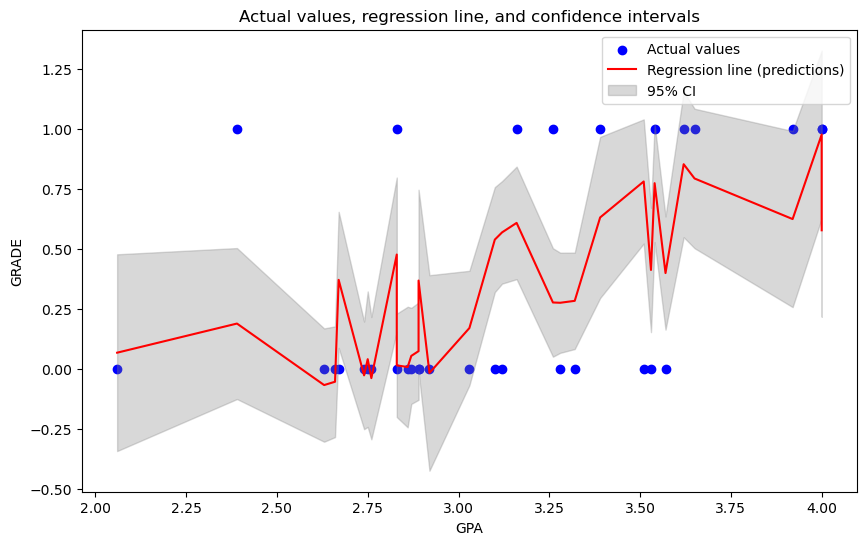

In [2]:
# Load the Spector dataset
data = sm.datasets.spector.load()
df = pd.DataFrame(data.data, columns=data.names)

# Display the dataset in a professional way
print("Spector dataset (First 5 rows):")
print(df.head())

# Prepare the data for OLS regression
X = sm.add_constant(df[['GPA', 'TUCE', 'PSI']])  # Add intercept term
y = df['GRADE']

# Build and fit the OLS model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

# Display the summary of the model
print("\nOLS regression results:")
print(ols_results.summary())

# Save the trained model
with open('ols_trained_model.pkl', 'wb') as f:
    pickle.dump(ols_results, f)

print("\nModel saved successfully")

# Load the saved model
with open('ols_trained_model.pkl', 'rb') as f:
    loaded_ols_model = pickle.load(f)
    print("\nModel loaded successfully")
    

# Make predictions
# We sort the dataset based on GPA for smoother plotting
sorted_df = df.sort_values(by='GPA')

# Prepare the sorted data for prediction
X_sorted = sm.add_constant(sorted_df[['GPA', 'TUCE', 'PSI']])  # Add intercept term

# Predict using the loaded model
predictions = loaded_ols_model.predict(X_sorted)

# Get confidence intervals for the regression line (95% by default)
predicted_mean_ci = loaded_ols_model.get_prediction(X_sorted).summary_frame(alpha=0.05)

# Extract the confidence intervals (lower and upper bounds)
conf_int_lower = predicted_mean_ci['mean_ci_lower']
conf_int_upper = predicted_mean_ci['mean_ci_upper']

plt.figure(figsize=(10, 6))
plt.scatter(sorted_df['GPA'], sorted_df['GRADE'], color='blue', label='Actual values')
plt.plot(sorted_df['GPA'], predictions, color='red', label='Regression line (predictions)')
plt.fill_between(sorted_df['GPA'], conf_int_lower, conf_int_upper, color='gray', alpha=0.3, label='95% CI')
plt.xlabel('GPA')
plt.ylabel('GRADE')
plt.title('Actual values, regression line, and confidence intervals')
plt.legend()
plt.show()

**Explanation**

- **Dataset**: We use the `Spector` dataset, which is included in the `statsmodels` library. The dataset contains information about students' performance on a binary grade outcome (pass/fail), along with predictor variables such as GPA, TUCE (test scores), and PSI (participation in a special program). We convert it into a pandas DataFrame for better data handling.
- **Preparing the data**: To fit an OLS regression model, we need to prepare the data:
    - **`X` (Predictors)**: We select the GPA, TUCE, and PSI columns as the predictors for the model. We also add a constant (intercept) using `sm.add_constant()`. This step is essential in regression models as it accounts for the baseline value when all predictors are zero.
    - **`y` (Response)**: The target variable is the `GRADE` column, which indicates the binary outcome.
- **Building and fitting the OLS model**: The OLS model is created using the `sm.OLS()` function, where we pass the response variable `y` and predictor variables `X`. We then call the `fit()` method to estimate the model's parameters.
- **OLS model summary**: The summary of the fitted model provides detailed statistical output, including:
    - **Coefficients**: The estimated values of the intercept and slopes for each predictor.
    - **P-values**: Used to assess the statistical significance of each coefficient.
    - **R-squared**: A measure of the proportion of the variance in the dependent variable that is predictable from the independent variables.
    - **Standard errors**: The standard deviation of the sampling distribution of the coefficient estimates.
    - **t-statistics**: Tests whether each coefficient is significantly different from zero.
    - **F-statistic**: Tests the overall significance of the model.
- **Saving the trained model**: We save the trained OLS model using the `pickle` module. This allows us to serialize the model object and store it in a file (`ols_trained_model.pkl`). This is useful when you want to reuse a trained model without having to refit it.
- **Loading the saved model**: Later, we can load the saved model using `pickle.load()` to restore the model object. This ensures that the model and its parameters are retained across sessions, enabling quick access to predictions or further analysis.
- **Making predictions**: To make predictions and prepare for visualization, we first sort the dataset by GPA to ensure a smooth plot. We create a sorted version of the predictor data (`X_sorted`), again adding the intercept term. The `.predict()` method is used to generate predictions for GRADE based on the sorted GPA, TUCE, and PSI values.
- **Calculating confidence intervals**: We calculate 95% confidence intervals for the predictions using the `.get_prediction()` method and `.summary_frame()`. This produces confidence intervals for each predicted value, providing a range within which the true regression line is expected to lie with 95% probability.


***Syntax of OLS***
```python
sm.OLS(endog, exog=None, missing='none', hasconst=None)
```

- **`endog` (Required)**: This is the dependent (response) variable (often denoted as `y`). It represents the variable we are trying to predict or explain using independent variables. The `endog` array should be a 1-dimensional array, vector, or (pandas) series.
- **`exog` (Optional)**: This represents the independent (predictor) variables (often denoted as `X`). It includes all the variables that are expected to have an influence on the `endog` variable. The `exog` should be a 2-dimensional array where each column represents a different predictor. If not specified, the model assumes the data includes an intercept (a constant term) and predictor variables. If we manually add a constant using `sm.add_constant()`, ensure that the data passed to `exog` contains that constant.
- **`missing` (Optional, default=`'none'`)**: Specifies how to handle missing values in the dataset. Use `'drop'` if we have missing values and want to automatically remove rows containing them. If missing data needs to be handled outside the model, set this to `'none'`. Typical values:
    - `'none'`: No special treatment for missing data.
    - `'drop'`: Drops missing data from both `endog` and `exog`. For most cases, `'drop'` is the preferred choice if the dataset contains missing values.
    - `'raise'`: Raises an error if missing data is found.
- **`hasconst` (Optional, default=`None`)**: Indicates whether the model already contains a constant (intercept) term. Set to `True` if we have manually added a constant (e.g., using `sm.add_constant()`), ensuring the model doesn’t add another intercept. Set to `False` if we want to force the model to add an intercept regardless of the data. Typical values
    - If `True`, it assumes that `exog` already includes a constant term, so the model will not add one automatically.
    - If `False`, it assumes no constant is present and will add one automatically.
    - If `None`, `statsmodels` will attempt to determine automatically if a constant is present.


---

### Weighted least squares (WLS) regression
WLS is a variation of OLS (assumes homoscedasticity, namely, constant variance of residuals) that accounts for heteroscedasticity, which occurs when the variance of the errors is not constant across observations. In WLS, different weights are assigned to different observations based on their variance. By applying weights to the observations, WLS aims to provide more accurate parameter estimates in the presence of heteroscedasticity.

Stackloss dataset (First 5 Rows):
   STACKLOSS  AIRFLOW  WATERTEMP  ACIDCONC
0       42.0     80.0       27.0      89.0
1       37.0     80.0       27.0      88.0
2       37.0     75.0       25.0      90.0
3       28.0     62.0       24.0      87.0
4       18.0     62.0       22.0      87.0

WLS regression results:
                            WLS Regression Results                            
Dep. Variable:              STACKLOSS   R-squared:                       0.914
Model:                            WLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     59.90
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           3.02e-09
Time:                        22:04:31   Log-Likelihood:                -52.288
No. Observations:                  21   AIC:                             112.6
Df Residuals:                      17   BIC:                             116.8
Df Model:                           3              

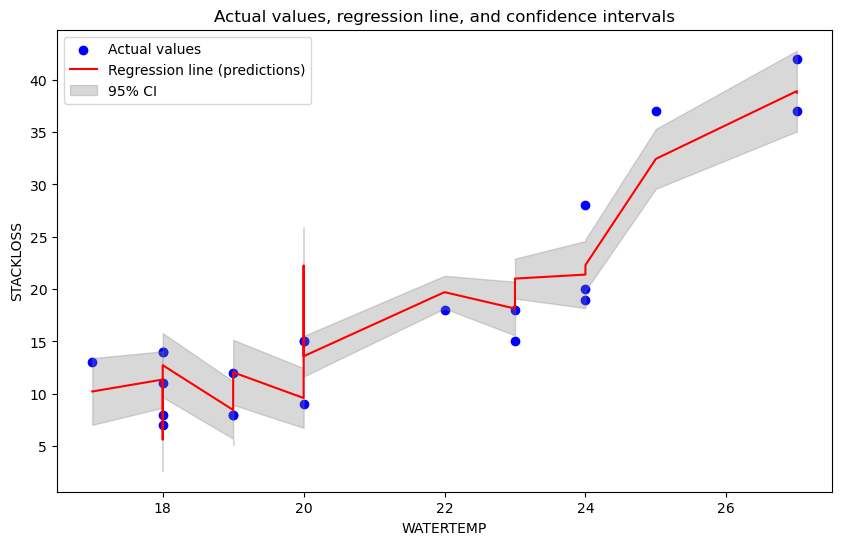

In [3]:
# Load the Stackloss dataset
data = sm.datasets.stackloss.load()
df = pd.DataFrame(data.data, columns=data.names)

# Display the dataset in a professional way
print("Stackloss dataset (First 5 Rows):")
print(df.head())

# Prepare the data for WLS regression
X = sm.add_constant(df[['AIRFLOW', 'WATERTEMP', 'ACIDCONC']])  # Add intercept term
y = df['STACKLOSS']


# Assign weights
## Step 1: Fit an initial OLS model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
## Step 2: Calculate the residuals from the OLS model
residuals = ols_results.resid
## Step 3: Estimate the variance of residuals (we can use a simple squared residuals method)
residual_variance = np.var(residuals)
## Step 4: Calculate the weights as the inverse of the residual variance
weights = 1 / residual_variance


# Build and fit the WLS model using the calculated weights
wls_model = sm.WLS(y, X, weights=weights)
wls_results = wls_model.fit()

# Display the summary of the model
print("\nWLS regression results:")
print(wls_results.summary())

# Save the trained model
with open('wls_trained_model.pkl', 'wb') as f:
    pickle.dump(wls_results, f)

print("\nModel saved successfully as 'wls_trained_model.pkl'")

# Load the saved model
with open('wls_trained_model.pkl', 'rb') as f:
    loaded_wls_model = pickle.load(f)
    print("\nModel loaded successfully")

    
# Make predictions and plot the results against sorted WATERTEMP values
sorted_df = df.sort_values(by='WATERTEMP')
X_sorted = sm.add_constant(sorted_df[['AIRFLOW', 'WATERTEMP', 'ACIDCONC']])

# Predict using the loaded model
predictions = loaded_wls_model.predict(X_sorted)

# Get confidence intervals for the regression line (95% by default)
predicted_mean_ci = loaded_wls_model.get_prediction(X_sorted).summary_frame(alpha=0.05)
conf_int_lower = predicted_mean_ci['mean_ci_lower']
conf_int_upper = predicted_mean_ci['mean_ci_upper']

# Plot the actual values, regression line, and confidence intervals
plt.figure(figsize=(10, 6))
plt.scatter(sorted_df['WATERTEMP'], sorted_df['STACKLOSS'], color='blue', label='Actual values')
plt.plot(sorted_df['WATERTEMP'], predictions, color='red', label='Regression line (predictions)')
plt.fill_between(sorted_df['WATERTEMP'], conf_int_lower, conf_int_upper, color='gray', alpha=0.3, label='95% CI')
plt.xlabel('WATERTEMP')
plt.ylabel('STACKLOSS')
plt.title('Actual values, regression line, and confidence intervals')
plt.legend()
plt.show()

**Explanation**

- **Dataset**: In this case, we use the `Stackloss` dataset from `statsmodels`. This dataset contains data on the performance of a chemical plant, with features such as air flow, water temperature, and acid concentration as predictors, and stack loss as the dependent variable.
- **Preparing the data**: As with OLS, we need to prepare the data for WLS:
    - **`X` (Predictors)**: We use `AirFlow`, `WaterTemp`, and `AcidConc.` as the predictor variables. We also add a constant (intercept) using `sm.add_constant()`.
    - **`y` (Response)**: The target variable is `stack.loss`, which measures the stack loss at the chemical plant.
    - **Weights**: In WLS, each observation is assigned a weight. In practice, the weights are based on the inverse of the residual variances from an initial OLS model. To calculate the weights, we first fit an OLS model to estimate the residuals. The variance of the residuals is calculated, which can be as simple as taking the variance of the residuals or modeling the residual variance based on a function of the predictors. We calculate the weights as the inverse of this variance, which ensures that observations with higher variance are downweighted.
- **Building and fitting the WLS model**: Similar to OLS, we use `sm.WLS()` to create the model. However, the key difference here is that we pass the `weights` argument to account for heteroscedasticity. After building the model, we call the `fit()` method to estimate the model parameters.

- **WLS model summary**: The WLS summary provides similar detailed statistical output as OLS, including:
    - **Coefficients**: The estimated values of the intercept and slopes for each predictor, adjusted for the weights.
    - **P-values**: Used to assess the statistical significance of each coefficient.
    - **R-squared**: Measures the proportion of the variance in the dependent variable explained by the independent variables, though in WLS this measure may not be as intuitive due to the weighted nature of the model.
    - **Standard errors**: The standard deviation of the sampling distribution of the coefficient estimates, adjusted for the weights.
    - **t-statistics**: Tests whether each coefficient is significantly different from zero.
    - **F-statistic**: Tests the overall significance of the model, again accounting for the weighted nature of the model.
- **Saving the trained model**: As with OLS, we save the trained WLS model using the `pickle` module. This serializes the model object and stores it in a file (`wls_trained_model.pkl`). This allows the model to be reused without needing to retrain it.
- **Loading the saved model**: Later, we can load the saved model using `pickle.load()` to restore the model object. This retains the model and its parameters across sessions, enabling further analysis or predictions using the trained model.
- **Making predictions**: To make predictions and prepare for visualization, we first sort the dataset by WATERTEMP to ensure a smooth plot. We create a sorted version of the predictor data (`X_sorted`), again adding the intercept term. The `.predict()` method is used to generate predictions for STACKLOSS based on the sorted WATERTEMP, AIRFLOW, and ACIDCONC values.
- **Calculating confidence intervals**: We calculate 95% confidence intervals for the predictions using the `.get_prediction()` method and `.summary_frame()`. This produces confidence intervals for each predicted value, providing a range within which the true regression line is expected to lie with 95% probability.

***Syntax of WLS***
```python
sm.WLS(endog, exog=None, weights=1.0, missing='none', hasconst=None)
```

- **`endog` (Required)**: This is the dependent (response) variable (similar to `OLS`). It represents the variable you are trying to predict or explain. Must be 1-dimensional.
- **`exog` (Optional)**: These are the independent variables (predictors) that explain the dependent variable. Similar to `OLS`, it should be 2-dimensional. Must ensure that it contains the constant term if needed.
- **`weights` (Optional)**: This parameter represents the weights applied to each observation in the regression. A higher weight implies that an observation is more important. Use this when the data points vary in importance or reliability. For instance, if some data points are believed to have higher measurement error, assign them lower weights. It should be array of weights that correspond to each observation, or use a constant weight across all observations by setting `weights=1.0`.
- **`missing` (Optional, default=`none`)**: Specifies how to handle missing data.
    - `'none'`: No action taken on missing data.
    - `'drop'`: Rows with missing values are dropped.
    - `'raise'`: An error is raised if missing data is detected.
- **`hasconst` (Optional, default=`None`)**: Indicates whether the model already includes a constant (intercept) term. Set this to `True` if we have manually added a constant, `False` if no constant is included and we want the method to add one.


---

### **Generalized least squares (GLS) regression**
GLS is an extension of OLS that handles situations where the residuals (errors) are correlated and/or heteroscedastic. GLS adjusts for non-constant error variances and correlations between residuals, which leads to more efficient and unbiased parameter estimates. While OLS assumes homoscedasticity and independent errors, and WLS assumes heteroscedasticity with no correlation between residuals, GLS can handle both heteroscedasticity and correlation between residuals. This is done by specifying a covariance matrix for the errors. 

In WLS, we assign weights to the observations to account for heteroscedasticity. In GLS, we go a step further by specifying a full covariance matrix that describes both the variance and the correlations between the errors. This allows GLS to model complex error structures more accurately.

Longley dataset (First 5 Rows):
    TOTEMP  GNPDEFL       GNP   UNEMP   ARMED       POP    YEAR
0  60323.0     83.0  234289.0  2356.0  1590.0  107608.0  1947.0
1  61122.0     88.5  259426.0  2325.0  1456.0  108632.0  1948.0
2  60171.0     88.2  258054.0  3682.0  1616.0  109773.0  1949.0
3  61187.0     89.5  284599.0  3351.0  1650.0  110929.0  1950.0
4  63221.0     96.2  328975.0  2099.0  3099.0  112075.0  1951.0

GLS regression results:
                            GLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.998
Model:                            GLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     996.3
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           3.78e-13
Time:                        22:04:32   Log-Likelihood:                -107.43
No. Observations:                  16   AIC:                             226.9
Df Res

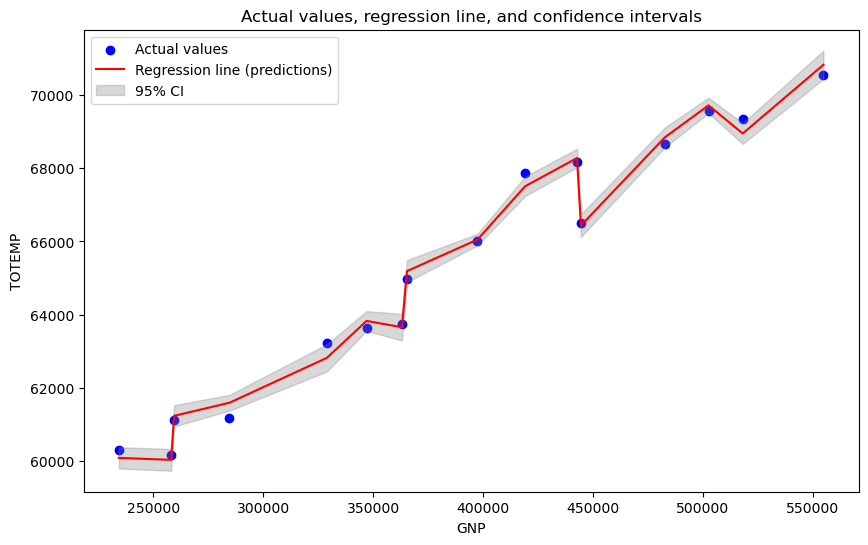

In [4]:
# Load the Longley dataset
data = sm.datasets.longley.load()
df = pd.DataFrame(data.data, columns=data.names)

# Display the dataset in a professional way
print("Longley dataset (First 5 Rows):")
print(df.head())

# Prepare the data for GLS regression
X = sm.add_constant(df[['GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR']])  # Add intercept term
y = df['TOTEMP']


# Specify a covariance matrix for the error terms
## Step 1: Fit an OLS model to obtain residuals
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
## Step 2: Calculate the residuals from the OLS model
residuals = ols_results.resid
## Step 3: Estimate an AR(1) model for the residuals to capture autocorrelation
ar_model = AutoReg(residuals, lags=1).fit()
## Step 4: Construct the covariance matrix based on the AR(1) process
rho = ar_model.params[1]  # The AR(1) coefficient
T = len(residuals)
sigma = np.eye(T)  # Start with an identity matrix
# Fill in the off-diagonal terms based on the AR(1) correlation structure
for i in range(T):
    for j in range(i+1, T):
        sigma[i, j] = rho ** abs(i - j)
        sigma[j, i] = sigma[i, j]

        
# Build and fit the GLS model
gls_model = sm.GLS(y, X, sigma=sigma)
gls_results = gls_model.fit()

# Display the summary of the model
print("\nGLS regression results:")
print(gls_results.summary())

# Save the trained model
with open('gls_trained_model.pkl', 'wb') as f:
    pickle.dump(gls_results, f)

print("\nModel saved successfully as 'gls_trained_model.pkl'")

# Load the saved model
with open('gls_trained_model.pkl', 'rb') as f:
    loaded_gls_model = pickle.load(f)
    print("\nModel loaded successfully")
    

# Make predictions and plot the results against sorted GNP values
sorted_df = df.sort_values(by='GNP')
X_sorted = sm.add_constant(sorted_df[['GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR']])

# Predict using the loaded model
predictions = loaded_gls_model.predict(X_sorted)

# Get confidence intervals for the regression line (95% by default)
predicted_mean_ci = loaded_gls_model.get_prediction(X_sorted).summary_frame(alpha=0.05)
conf_int_lower = predicted_mean_ci['mean_ci_lower']
conf_int_upper = predicted_mean_ci['mean_ci_upper']

# Plot the actual values, regression line, and confidence intervals
plt.figure(figsize=(10, 6))
plt.scatter(sorted_df['GNP'], sorted_df['TOTEMP'], color='blue', label='Actual values')
plt.plot(sorted_df['GNP'], predictions, color='red', label='Regression line (predictions)')
plt.fill_between(sorted_df['GNP'], conf_int_lower, conf_int_upper, color='gray', alpha=0.3, label='95% CI')
plt.xlabel('GNP')
plt.ylabel('TOTEMP')
plt.title('Actual values, regression line, and confidence intervals')
plt.legend()
plt.show()

**Explanation**

- **Dataset**: For GLS, we use the `Longley` dataset from `statsmodels`, which contains macroeconomic data for the United States. The dependent variable `TOTEMP` represents total employment, and the independent variables include various economic indicators like GNP, unemployment, and armed forces personnel.
- **Preparing the data**: Similar to OLS and WLS, we prepare the data:
    - **`X` (Predictors)**: We use `GNP`, `UNEMP`, `ARMED`, `POP`, and `YEAR` as the predictor variables. As usual, we add a constant (intercept) using `sm.add_constant()`.
    - **`y` (Response)**: The target variable is `TOTEMP`, which represents total employment in the dataset.
- **Covariance matrix**: The key difference between GLS and OLS/WLS is that GLS allows us to specify the covariance structure of the residuals. The covariance matrix is typically estimated using models that account for correlation among errors, such as AR(1). To calculate the covariance matrix, we first fit an AR(1) model to the residuals of an initial OLS fit to capture the first-order autocorrelation structure. The parameter `rho` represents the strength of the autocorrelation. We use `rho` to construct a covariance matrix based on the AR(1) correlation structure. The off-diagonal elements of the matrix are populated according to the AR(1) process, where the correlation between residuals decreases with time lag. A simple diagonal covariance matrix (`sigma`), assuming homoscedasticity and no correlation between errors.
- **Building and fitting the GLS model**: We create the GLS model using `sm.GLS()`, passing the response variable `y`, predictor variables `X`, and the covariance matrix `sigma`. GLS adjusts for both heteroscedasticity and correlations in the residuals by using the specified covariance structure. After building the model, we call the `fit()` method to estimate the model's parameters.
- **GLS model summary**: The summary provides similar statistical outputs as OLS and WLS, including:
    - **Coefficients**: The estimated values of the intercept and slopes for each predictor, adjusted based on the specified error covariance matrix.
    - **P-values**: Indicating the statistical significance of each coefficient.
    - **R-squared**: Measuring the proportion of the variance in the dependent variable explained by the independent variables.
    - **Standard Errors**: The standard deviation of the coefficient estimates, adjusted based on the covariance structure of the errors.
    - **t-statistics**: Testing whether each coefficient is significantly different from zero.
    - **F-statistic**: Testing the overall significance of the model, considering the covariance structure of the errors.
- **Saving the trained model**: We save the GLS model using the `pickle` module, which serializes the model object and stores it in a file (`gls_trained_model.pkl`). This allows the model to be reused later without having to retrain it.
- **Loading the saved model**: Similar to OLS and WLS, we load the saved GLS model using `pickle.load()`. This restores the trained model, allowing for further analysis or predictions using the saved parameters.
- **Making predictions**: To make predictions and prepare for visualization, we first sort the dataset by GNP to ensure a smooth plot. We create a sorted version of the predictor data (`X_sorted`), again adding the intercept term. The `.predict()` method is used to generate predictions for TOTEMP based on the sorted GNP, UNEMP, ARMED, POP, and YEAR values.
- **Calculating confidence intervals**: We calculate 95% confidence intervals for the predictions using the `.get_prediction()` method and `.summary_frame()`. This produces confidence intervals for each predicted value, providing a range within which the true regression line is expected to lie with 95% probability.

***Syntax of GLS***
```python
sm.GLS(endog, exog=None, sigma=None, missing='none', hasconst=None)
```

- **`endog` (Required)**: The dependent (response) variable (similar to `OLS` and `WLS`). It represents the variable you're trying to predict.
- **`exog` (Optional)**: These are the independent variables (predictors) that explain the dependent variable. Like in `OLS`, it must be 2-dimensional.
- **`sigma` (Optional)**: This represents the covariance matrix of the errors (residuals). It accounts for autocorrelation or heteroscedasticity in the error terms. Use `sigma` when the errors are believed to be correlated or have unequal variances across observations. This is particularly useful in time-series data with autocorrelated errors or clustered data. It often derived from modeling the error structure, such as using an AR(1) or ARMA model. The covariance matrix must be positive definite and symmetric.
- **`missing` (Optional, default=`'none'`)**: Specifies how to handle missing data. Similar to `OLS` and `WLS`.
- **`hasconst` (Optional, default=`None`)**: Indicates whether the model already includes a constant (intercept) term. Set this to `True` if we have manually added a constant, `False` if no constant is included and we want the method to add one.